# Interpolate between-spots

## Main steps

Step 1：Filter spots that are not in tissue, only reserve the spots with 1 in `in_tissue` column \
Step 2：Horizontal direction, interpolate new spot between the given spot (x_1, y_1) and its right spot (x_2, y_2) \
Step 3：Vertical direction, for one row and its up-adjacent row, \
    - select two closest spots (x_l, y_l) and (x_r, y_r) in the above row to the given spot (x_o, y_o) in this row, \
    - interpolate one new spot in two adjacent rows.

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
path = '/mnt/lingyu/nfs_share2/Python/'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
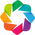

In [4]:
os.chdir(str(path) + 'FineST/FineST/')
import FineST as fst
from FineST.datasets import dataset
import FineST.plottings as fstplt

In [5]:
import importlib
import sys
sys.path.append(str(path)+'FineST/FineST/') 
import FineST as fst
import FineST.processData 
importlib.reload(FineST.processData )
from FineST.processData  import *

## 1. Load and filter original position list 

Input: `tissue_positions_list.csv` file in `spatial` folder of ST data. 

In [6]:
patientxy = 'patient1'
os.chdir(str(path)+'FineST/FineST_local/Dataset/NPC/'+str(patientxy)+'/')

position = fst.filter_pos_list('tissue_positions_list.csv')
position

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
33,GTGTGAGCCGAGGTGC-1,1,1,33,1612,5423
35,GGGAACCACCTGTTTC-1,1,1,35,1613,5638
36,GTTCGTTGCGGACCAG-1,1,0,36,1426,5745
37,TGAGGTTGATCCCAAG-1,1,1,37,1613,5852
38,GATGCCACACTACAGC-1,1,0,38,1427,5960
...,...,...,...,...,...,...
3396,TTCGACAGAGCCCGTG-1,1,52,68,11140,9153
3397,AAGCATACTCTCCTGA-1,1,53,69,11327,9260
3398,GACGACGATCCGCGTT-1,1,52,70,11141,9368
3399,GGTAGAAGACCGCCTG-1,1,53,71,11328,9474


## 2. Interpolate 'between spots' in horizontal and vertical directions 

In [7]:
position_x = fst.inter_spot(position, direction='x')
position_x

,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,21,18,5340.5,3804.5
1,20,19,5154.5,3912.5
2,22,19,5527.5,3911.5
3,19,20,4968.0,4020.0
4,21,20,5341.5,4019.5
...,...,...,...,...
1125,38,103,8537.0,12914.0
1126,40,103,8910.5,12913.5
1127,37,104,8350.5,13021.5
1128,39,104,8724.0,13020.5


In [8]:
position_y = fst.inter_spot(position, direction='y')
position_y

,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,20.5,17.5,5247.5,3751.0
1,21.5,17.5,5434.0,3750.5
2,28.5,17.5,6740.5,3747.0
3,25.5,17.5,6180.5,3748.5
4,19.5,18.5,5061.0,3859.0
...,...,...,...,...
2651,38.5,104.5,8630.5,13074.5
2652,39.5,104.5,8817.5,13074.0
2653,38.5,104.5,8631.0,13074.5
2654,37.5,105.5,8444.5,13182.5


## 3. Integrate 'between spot' and 'within spot'

`position_add`: the position list of all `between spots` (m ~= 3n) 

In [9]:
position_add = fst.final_pos_list(position_x, position_y, position=None)
position_add

,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,20.5,17.5,5247.5,3751.0
1,21.5,17.5,5434.0,3750.5
2,25.5,17.5,6180.5,3748.5
3,28.5,17.5,6740.5,3747.0
4,21.0,18.0,5340.5,3804.5
...,...,...,...,...
3703,38.5,104.5,8631.0,13074.5
3704,39.5,104.5,8817.5,13074.0
3705,38.0,105.0,8537.5,13128.5
3706,37.5,105.5,8444.5,13182.5


`position_all`: the position list of all `between spots` and all `within spot` (m+n ~= 4n) 

In [10]:
position_all = fst.final_pos_list(position_x, position_y, position)
position_all

,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,50.0,0.0,10749.0,1860.0
1,21.0,17.0,5341.0,3697.0
2,29.0,17.0,6834.0,3693.0
3,20.5,17.5,5247.5,3751.0
4,21.5,17.5,5434.0,3750.5
...,...,...,...,...
5034,38.0,105.0,8537.5,13128.5
5035,39.0,105.0,8724.0,13128.0
5036,37.5,105.5,8444.5,13182.5
5037,38.5,105.5,8631.0,13182.0


In [11]:
!pwd

/mnt/lingyu/nfs_share2/Python/FineST/FineST_local/Dataset/NPC/patient1


In [ ]:
## save position list to .csv file
position_add.to_csv(str(patientxy)+"_position_add_tissue.csv")   
position_all.to_csv(str(patientxy)+"_position_all_tissue.csv")    

In [13]:
print(position_add.shape[0]/position.shape[0])
print(position_all.shape[0]/position.shape[0])

2.7858752817430505
3.7858752817430505
